Najpierw w konsoli: 
pip install -r requirements.txt

In [ ]:
from huggingface_hub import hf_hub_download
from huggingface_hub import login
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image
import numpy as np
import pandas as pd
from PIL import ImageEnhance
import random

In [2]:
# stworzyć konto na hugging face, logowanie przy użyciu utworzonego tokena
login()

In [2]:
ds = load_dataset("mertcobanov/animals")  # WA: jeśli wyrzuca brak uprawnień, uruchomić tą komórkę jeszcze raz

Resolving data files:   0%|          | 0/5400 [00:00<?, ?it/s]

In [3]:
# zamiana na obiekt DataFrame - imo łatwiejsza praca
df = ds['train'].to_pandas()

In [4]:
# 90 klas oznaczonych numerami, trzeba ręcznie zamienić
unique_labels = set(df['label'])
print(len(unique_labels))
unique_labels

90


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89}

In [5]:
# słownik mapujący etykiety liczbowe na słowne
name_change = {
0: 'antelope'         ,
1: 'badger'           ,
2: 'bat'              ,
3: 'bear'             ,
4: 'bee'              ,
5: 'beetle'           ,
6: 'bison'            ,
7: 'boar'             ,
8: 'butterfly'        ,
9: 'cat'              ,
10: 'caterpillar'     ,
11: 'chimpanzee'      ,
12: 'cockroach'       ,
13: 'cow'             ,
14: 'coyote'          ,
15: 'crab'            ,
16: 'crow'            ,
17: 'deer'            ,
18: 'dog'             ,
19: 'dolphin'         ,
20: 'donkey'          ,
21: 'dragonfly'       ,
22: 'duck'            ,
23: 'eagle'           ,
24: 'elephant'        ,
25: 'flamingo'        ,
26: 'fly'             ,
27: 'fox'             ,
28: 'goat'            ,
29: 'goldfish'        ,
30: 'goose'           ,
31: 'gorilla'         ,
32: 'grasshopper'     ,
33: 'hamster'         ,
34: 'hare'            ,
35: 'hedgehog'        ,
36: 'hippopotamus'    ,
37: 'hornbill'        ,
38: 'horse'           ,
39: 'hummingbird'     ,
40: 'hyena'           ,
41: 'jellyfish'       ,
42: 'kangaroo'        ,
43: 'koala'           ,
44: 'ladybugs'        ,
45: 'leopard'         ,
46: 'lion'            ,
47: 'lizard'          ,
48: 'lobster'         ,
49: 'mosquito'	      ,
50: 'moth'	          ,
51: 'mouse'           ,
52: 'octopus'	      ,
53: 'okapi'           ,
54: 'orangutan'       ,
55: 'otter'           ,
56: 'owl'             ,
57: 'ox'              ,
58: 'oyster'          ,
59: 'panda'	          ,
60: 'parrot'	      ,
61: 'pelecaniformes',	
62: 'penguin'	      ,
63: 'pig'	          ,
64: 'pigeon'          ,
65: 'porcupine'	      ,
66: 'possum'          ,
67: 'raccoon'	      ,
68: 'rat'	          ,
69: 'reindeer'	      ,
70: 'rhinoceros'      ,
71: 'sandpiper'       ,
72: 'seahorse'        ,
73: 'seal'            ,
74: 'shark'           ,
75: 'sheep'	          ,
76: 'snake'	          ,
77: 'sparrow'	      ,
78: 'squid'	          ,
79: 'squirrel'	      ,
80: 'starfish'        ,
81: 'swan'            ,
82: 'tiger'	          ,
83: 'turkey'          ,
84: 'turtle'          ,
85: 'whale'	          ,
86: 'wolf'            ,
87: 'wombat'	      ,
88: 'woodpecker'	  ,
89: 'zebra'           ,
}

In [5]:
df['label'] = df['label'].map(name_change)
df

NameError: name 'name_change' is not defined

In [6]:
df.iloc[1]["image"]

{'bytes': None,
 'path': 'C:\\Users\\sebex\\.cache\\huggingface\\hub\\datasets--mertcobanov--animals\\snapshots\\cfafe186d34b9cf24e232b58c3423aab055a917c\\animals\\antelope\\03d7fc0888.jpg'}

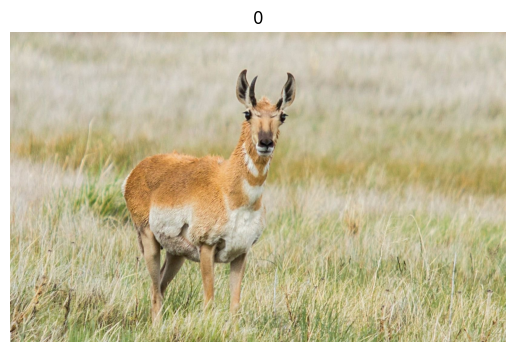

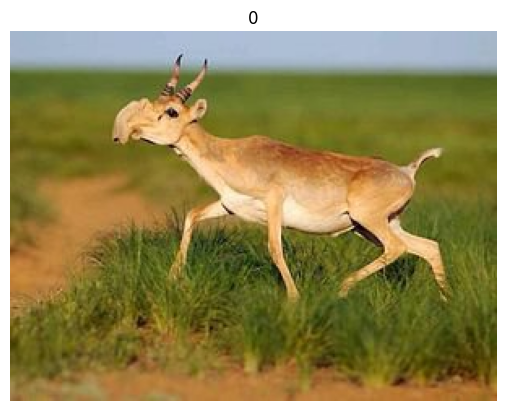

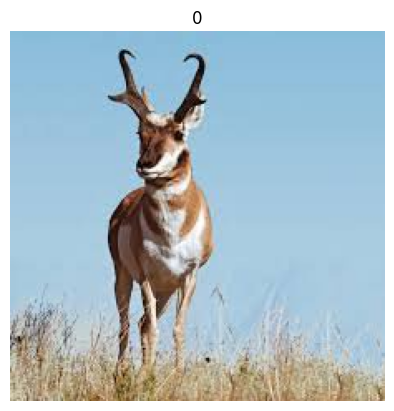

In [7]:
# podgląd kilku przykładowych zdj.

x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

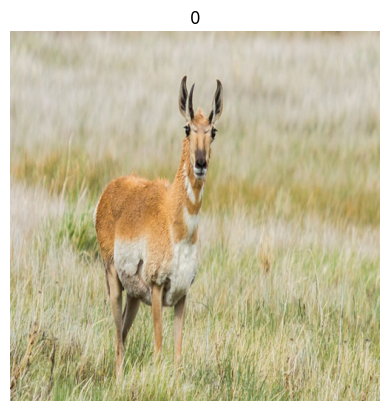

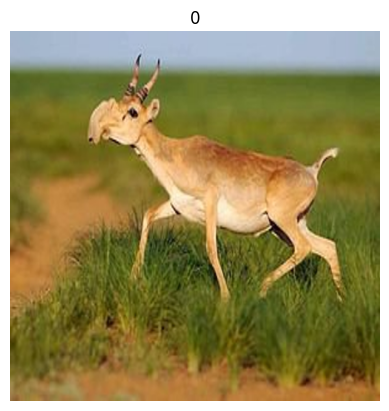

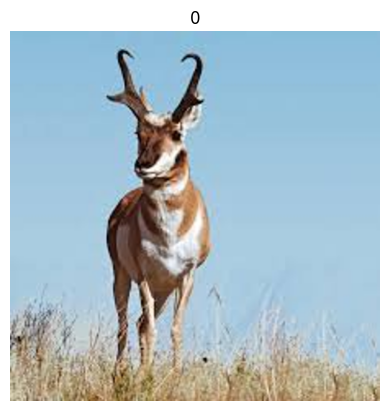

In [8]:
# Wyświetlanie wybranych zdjęć po próbnym ujednoliceniu rozmiaru i normalizacji wartości pikseli
x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    image = image.resize((500, 500))
    pixels = np.asarray(image).astype('float32') / 255.0
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

In [12]:
# Sprawdzenie największych i najmniejszych wysokości i szerokości zdjęć
imgs_widths = []
imgs_heights = []

for i, img_info in enumerate(df['image']):
    image_path = img_info['path']
    image = Image.open(image_path)
    imgs_widths.append(image.size[0])
    imgs_heights.append(image.size[1])

print(f"Najmniejsza szerokość zdjęcia: {min(imgs_widths)}")
print(f"Największa szerokość zdjęcia: {max(imgs_widths)}")
print(f"Najmniejsza wysokość zdjęcia: {min(imgs_heights)}")
print(f"Największa wysokość zdjęcia: {max(imgs_heights)}")

Najmniejsza szerokość zdjęcia: 145
Największa szerokość zdjęcia: 4928
Najmniejsza wysokość zdjęcia: 120
Największa wysokość zdjęcia: 4064


In [ ]:
# rescaled_images = []

# for img_info in df['image']:
#     rescaled_images.append(Image.open(img_info['path']).resize((500, 500)))

# df['rescaled_images'] = rescaled_images

# df['path'] = [row['path'] for row in df['image']]
# df = df.assign(PIL_images = lambda x: Image.open(x['path']).resize((1000, 1000)))

In [ ]:
# processed_images = []

# for image in df['rescaled_images']:
#     processed_images.append(np.asarray(image) / 255.0)

# df['processed_images'] = processed_images

# df = df.assign(pixels = lambda x: np.asarray(x['rescaled_images']).astype('float32'))
# df = df.assign(processed_images = lambda x: np.asarray(x['rescaled_images']).astype('float32') / 255.0)

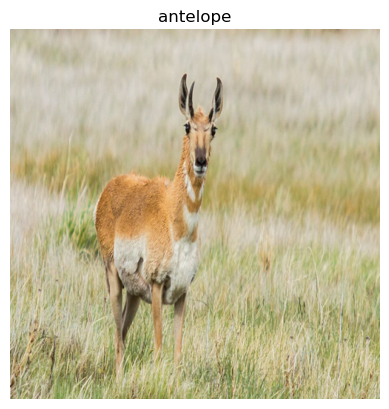

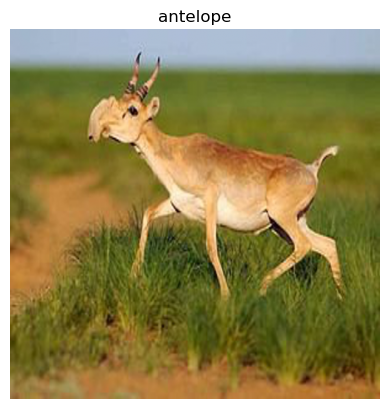

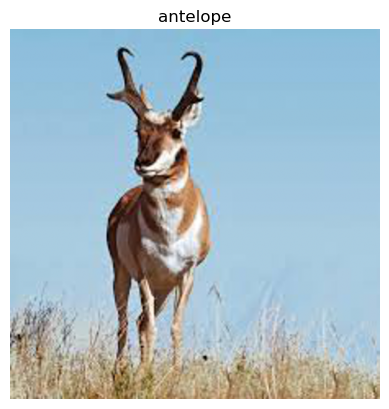

In [17]:
# Wyświetlanie wybranych zdjęć po ujednoliceniu rozmiaru i normalizacji wartości pikseli
x = 3
imgs = df['processed_images'][:x]
labels = df['label'][:x]

for i, image in enumerate(imgs):
    pixels = np.asarray(image).astype('float32') / 255.0
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

In [9]:
def crop_image(image, crop_size=(450, 450)):
    width, height = image.size
    crop_width, crop_height = crop_size
    left = random.randint(0, width - crop_width)
    upper = random.randint(0, height - crop_height)
    cropped_image = image.crop((left, upper, left + crop_width, upper + crop_height))
    return cropped_image


def adjust_brightness(image, brightness_range=(0.8, 1.2)):
    enhancer = ImageEnhance.Brightness(image)
    brightness_factor = random.uniform(*brightness_range)
    enhanced_image = enhancer.enhance(brightness_factor)
    return enhanced_image


In [ ]:
# cropped_images = []
# brightness_adjusted_images = []

# for img_info in df['rescaled_images']:
#     cropped = crop_image(img_info, crop_size=(400, 400))
#     cropped_images.append(cropped)
    
#     brightness_adjusted = adjust_brightness(img_info, brightness_range=(0.8, 1.2))
#     brightness_adjusted_images.append(brightness_adjusted)

# df['cropped_images'] = cropped_images
# df['brightness_adjusted_images'] = brightness_adjusted_images


In [10]:
# Wyciągamy ścieżki zdjęć do nowej kolumny
df['image_paths'] = df['image'].apply(lambda row: row['path'])

In [11]:
# Tworzymy obiekty zdjęć pillow ze zdjęć podanych w ścieżkach
df['raw_images'] = df['image_paths'].apply(lambda image_path: Image.open(image_path))

In [12]:
# Normalizujemy wymiary zdjęć do 400 x 400 pikseli
df['resized_images'] = df['raw_images'].apply(lambda raw_image: raw_image.resize((400, 400)))

In [13]:
df.drop(['image', 'image_paths', 'raw_images'], axis=1, inplace=True)

In [14]:
# Wymiary obiektów zdjęć
np.array(df['resized_images'].iloc[0]).shape

(400, 400, 3)

In [15]:
# Nowy zestaw zdjęć, który przycinamy do rozmiaru 450 x 450 dla augmentacji
df['cropped_images'] = df['resized_images'].apply(lambda resized_image: crop_image(resized_image, crop_size=(380, 380)))

In [16]:
# Przycięty zestaw zdjęć skalujemy do rozmiaru 500 x 500, aby wszystkie zdjęcia miały jednakowe wymiary, lecz część
# zdjęć utraciła pewną powierzchnię tła, a kształty zwięrząt stały się większe
df['cropped_images'] = df['cropped_images'].apply(lambda cropped_image: cropped_image.resize((400, 400)))

In [17]:
# Utworzenie zestawu zdjęć ze zmienioną jasnością dla augmentacji
df['brightness_adjusted_images'] = df['resized_images'].apply(lambda resized_image: adjust_brightness(resized_image))

In [ ]:
# df['processed_images'] = df['resized_images'].apply(lambda resized_image: np.asarray(resized_image).astype('float32') / 255.0)
# df = df.assign(PIL_images = lambda x: Image.open(list(x['image_paths'])).resize((500, 500)))
# df = df.assign(PIL_images = lambda x: map(lambda x: Image.open(x), x['image_paths']))

In [18]:
df['resized_images'] = df['resized_images'].apply(lambda resized_image: np.asarray(resized_image).astype('float32') / 255.0)

In [19]:
df['cropped_images'] = df['cropped_images'].apply(lambda cropped_images: np.asarray(cropped_images).astype('float32') / 255.0)

In [20]:
df['brightness_adjusted_images'] = df['brightness_adjusted_images'].apply(lambda brightness_adjusted_images: np.asarray(brightness_adjusted_images).astype('float32') / 255.0)

In [27]:
df

,label,resized_images,cropped_images,brightness_adjusted_images
0,0,"[[[0.74509805, 0.7137255, 0.6313726], [0.73725...","[[[0.7607843, 0.7294118, 0.6392157], [0.756862...","[[[0.654902, 0.627451, 0.5529412], [0.64705884..."
1,0,"[[[0.6431373, 0.7137255, 0.8], [0.6431373, 0.7...","[[[0.6509804, 0.70980394, 0.8], [0.6509804, 0....","[[[0.5411765, 0.6, 0.6745098], [0.5411765, 0.6..."
2,0,"[[[0.5294118, 0.7411765, 0.8509804], [0.529411...","[[[0.54509807, 0.74509805, 0.85882354], [0.541...","[[[0.62352943, 0.8745098, 1.0], [0.62352943, 0..."
3,0,"[[[0.5647059, 0.4862745, 0.35686275], [0.58039...","[[[0.45490196, 0.44313726, 0.25490198], [0.447...","[[[0.63529414, 0.54509807, 0.4], [0.6509804, 0..."
4,0,"[[[0.5568628, 0.38431373, 0.20784314], [0.5411...","[[[0.64705884, 0.49411765, 0.2784314], [0.6784...","[[[0.47058824, 0.3254902, 0.17254902], [0.4549..."
...,...,...,...,...
5395,89,"[[[0.015686275, 0.023529412, 0.011764706], [0....","[[[0.007843138, 0.015686275, 0.003921569], [0....","[[[0.011764706, 0.015686275, 0.007843138], [0...."
5396,89,"[[[0.74509805, 0.77254903, 0.79607844], [0.745...","[[[0.74509805, 0.77254903, 0.79607844], [0.745...","[[[0.83137256, 0.8627451, 0.8901961], [0.83137..."
5397,89,"[[[0.6784314, 0.73333335, 0.6039216], [0.68235...","[[[0.60784316, 0.65882355, 0.54901963], [0.615...","[[[0.65882355, 0.7137255, 0.5882353], [0.66274..."
5398,89,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...","[[[0.5882353, 0.52156866, 0.41960785], [0.6, 0...","[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [23]:
import pandas as pd

In [35]:
df = pd.concat([pd.concat([df['resized_images'], df['cropped_images'], df['brightness_adjusted_images']], join='outer', ignore_index=True), pd.concat([df['label'], df['label'], df['label']], join='outer', ignore_index=True)], axis=1, ignore_index=True)

In [50]:
df.rename(columns={0: 'images', 1: 'labels'}, inplace=True)

In [54]:
df

,images,labels
0,"[[[0.74509805, 0.7137255, 0.6313726], [0.73725...",0
1,"[[[0.6431373, 0.7137255, 0.8], [0.6431373, 0.7...",0
2,"[[[0.5294118, 0.7411765, 0.8509804], [0.529411...",0
3,"[[[0.5647059, 0.4862745, 0.35686275], [0.58039...",0
4,"[[[0.5568628, 0.38431373, 0.20784314], [0.5411...",0
...,...,...
16195,"[[[0.011764706, 0.015686275, 0.007843138], [0....",89
16196,"[[[0.83137256, 0.8627451, 0.8901961], [0.83137...",89
16197,"[[[0.65882355, 0.7137255, 0.5882353], [0.66274...",89
16198,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",89


In [ ]:
# Opcjonalny zapis na dysku
df.to_pickle(r'D:\ZUM\animals_data_frame.pkl')

In [ ]:
# Opcjonalny odczyt z dysku
df = pd.read_pickle(r'D:\ZUM\animals_data_frame.pkl')

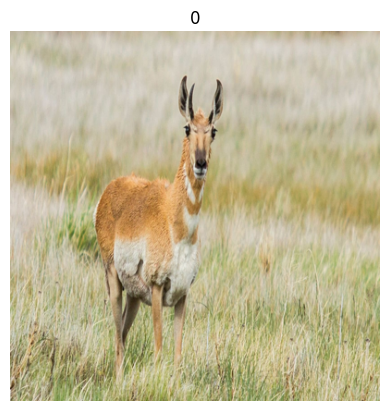

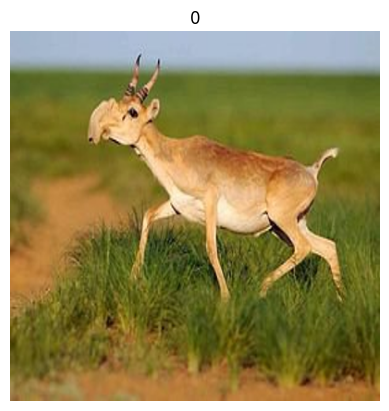

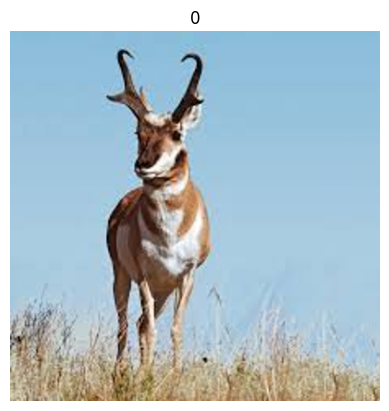

In [70]:
for label, image in zip(df['labels'][:3], df['images'][:3]):
    plt.figure()
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()